# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [56]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=40)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=40)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

39

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [57]:
# Build API Call URL
baseurl = "https://api.openweathermap.org/data/2.5/weather?q="

# Define meta-variables for the loop
i = 0
JSONList = []

for city in cities:
    try:
        i += 1
        cityname = city.replace(" ","_")
        fullurl = (baseurl + cityname + "&appid=" + weather_api_key)
        response = requests.get(fullurl)
        cityData = response.json()
        print("Line " + str(i) + ": " + fullurl)
        JSONList.append(cityData)
    except:
        i += 1
        print("Line " + str(i) + ": Failure to retrieve data from: " + fullurl)

Line 1: https://api.openweathermap.org/data/2.5/weather?q=tasiilaq&appid=37c3095ce4fba33c43176ad5ede6a266
Line 2: https://api.openweathermap.org/data/2.5/weather?q=punta_arenas&appid=37c3095ce4fba33c43176ad5ede6a266
Line 3: https://api.openweathermap.org/data/2.5/weather?q=illoqqortoormiut&appid=37c3095ce4fba33c43176ad5ede6a266
Line 4: https://api.openweathermap.org/data/2.5/weather?q=omachi&appid=37c3095ce4fba33c43176ad5ede6a266
Line 5: https://api.openweathermap.org/data/2.5/weather?q=kapaa&appid=37c3095ce4fba33c43176ad5ede6a266
Line 6: https://api.openweathermap.org/data/2.5/weather?q=souillac&appid=37c3095ce4fba33c43176ad5ede6a266
Line 7: https://api.openweathermap.org/data/2.5/weather?q=busselton&appid=37c3095ce4fba33c43176ad5ede6a266
Line 8: https://api.openweathermap.org/data/2.5/weather?q=amderma&appid=37c3095ce4fba33c43176ad5ede6a266
Line 9: https://api.openweathermap.org/data/2.5/weather?q=ponta_do_sol&appid=37c3095ce4fba33c43176ad5ede6a266
Line 10: https://api.openweathermap

In [59]:
cityList = []

for entry in JSONList:
    try:
        #Extract Data
        citynamedata = entry["name"]
        print(citynamedata)
        
        lat = entry["coord"]["lat"]
        print(lat)
        
        lng = entry["coord"]["lon"]
        print(lng)
        
        maxtemp = entry["main"]["temp_max"]
        print(maxtemp)
        
        humidity = entry["main"]["humidity"]
        print(humidity)
        
        cloudiness = entry["clouds"]["all"]
        print(cloudiness)
        
        windspeed = entry["wind"]["speed"]
        print(windspeed)
        
        country = entry["sys"]["country"]
        print(country)
        
        date = entry["dt"]
        print(date)
        
        weatherDict = {
            "Name" : citynamedata,
            "Latitude" : lat,
            "Longitude" : lng,
            "Max Temp" : maxtemp,
            "Humidity" : humidity,
            "Cloudiness" : cloudiness,
            "Wind Speed" : windspeed,
            "Country" : country,
            "Date" : date
        }
        cityList.append(weatherDict)
    except:
        print("Unable to process.")

Tasiilaq
65.61
-37.64
276.15
93
97
4.1
GL
1595550546
Unable to process.
Unable to process.
Ōmachi
36.5
137.87
295.93
83
75
5.7
JP
1595550547
Kapaa
22.08
-159.32
303.15
70
40
5.1
US
1595550326
Souillac
-20.52
57.52
293.15
60
40
6.7
MU
1595550443
Busselton
-33.65
115.33
279.26
80
3
2.84
AU
1595550547
Unable to process.
Unable to process.
Upernavik
72.79
-56.15
280.89
77
69
4.81
GL
1595550444
Unable to process.
Thompson
55.74
-97.86
302.15
54
40
4.6
CA
1595550548
Atuona
-9.8
-139.03
299.56
75
4
7.68
PF
1595550549
Shawnee
39.05
-95.77
305.15
59
1
2.1
US
1595550549
Arlit
18.74
7.39
307.18
35
43
5.5
NE
1595550549
Mataura
-46.19
168.86
277.04
83
83
1.34
NZ
1595550184
Ilulissat
69.22
-51.1
285.15
66
100
1.5
GL
1595550549
Ushuaia
-54.8
-68.3
277.15
85
40
5.1
AR
1595550145
Unable to process.
Unable to process.
Lundazi
-12.29
33.18
285.27
76
0
4.04
ZM
1595550550
Deputatsky
69.3
139.9
299.08
34
65
1.28
RU
1595550550
Calabozo
8.92
-67.43
297.98
87
23
1.75
VE
1595550551
Unable to process.
Tiarei
-17

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [60]:
# Create DataFrame
weatherDF = pd.DataFrame(cityList)
weatherDF

,Name,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.61,-37.64,276.15,93,97,4.10,GL,1595550546
1,Ōmachi,36.50,137.87,295.93,83,75,5.70,JP,1595550547
2,Kapaa,22.08,-159.32,303.15,70,40,5.10,US,1595550326
3,Souillac,-20.52,57.52,293.15,60,40,6.70,MU,1595550443
4,Busselton,-33.65,115.33,279.26,80,3,2.84,AU,1595550547
5,Upernavik,72.79,-56.15,280.89,77,69,4.81,GL,1595550444
6,Thompson,55.74,-97.86,302.15,54,40,4.60,CA,1595550548
7,Atuona,-9.80,-139.03,299.56,75,4,7.68,PF,1595550549
8,Shawnee,39.05,-95.77,305.15,59,1,2.10,US,1595550549
9,Arlit,18.74,7.39,307.18,35,43,5.50,NE,1595550549


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [74]:
# Create variable for storing index
indexList = []
j = 0

# Remove city from list if humidity is over 100
for city in cityList:
    if city["Humidity"] > 100:
        indexList.add(j)
        j += 1

In [75]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
for index in indexList:
    weatherDF = weatherDF.drop(index)
    
newWeatherDF = weatherDF
newWeatherDF.to_csv("../output_data/City_Data.csv")
newWeatherDF

,Name,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.61,-37.64,276.15,93,97,4.10,GL,1595550546
1,Ōmachi,36.50,137.87,295.93,83,75,5.70,JP,1595550547
2,Kapaa,22.08,-159.32,303.15,70,40,5.10,US,1595550326
3,Souillac,-20.52,57.52,293.15,60,40,6.70,MU,1595550443
4,Busselton,-33.65,115.33,279.26,80,3,2.84,AU,1595550547
5,Upernavik,72.79,-56.15,280.89,77,69,4.81,GL,1595550444
6,Thompson,55.74,-97.86,302.15,54,40,4.60,CA,1595550548
7,Atuona,-9.80,-139.03,299.56,75,4,7.68,PF,1595550549
8,Shawnee,39.05,-95.77,305.15,59,1,2.10,US,1595550549
9,Arlit,18.74,7.39,307.18,35,43,5.50,NE,1595550549


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

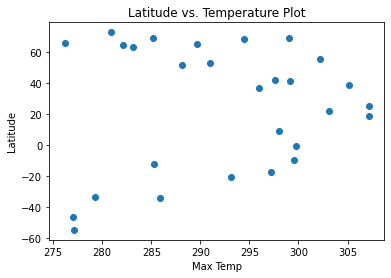

In [76]:
plt.scatter(newWeatherDF["Max Temp"],newWeatherDF["Latitude"])
plt.title("Latitude vs. Temperature Plot")
plt.xlabel("Max Temp")
plt.ylabel("Latitude")
plt.savefig("../output_data/fig1.png")
plt.show()

## Latitude vs. Humidity Plot

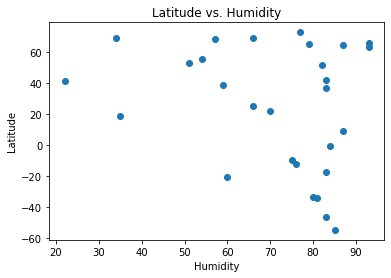

In [77]:
plt.scatter(newWeatherDF["Humidity"],newWeatherDF["Latitude"])
plt.title("Latitude vs. Humidity")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.savefig("../output_data/fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

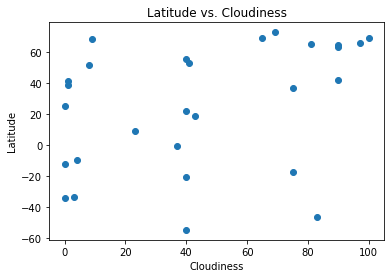

In [78]:
plt.scatter(newWeatherDF["Cloudiness"],newWeatherDF["Latitude"])
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.savefig("../output_data/fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

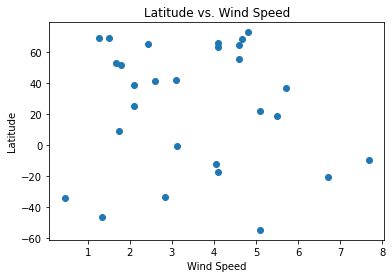

In [79]:
plt.scatter(newWeatherDF["Wind Speed"],newWeatherDF["Latitude"])
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.savefig("../output_data/fig4.png")
plt.show()

## Linear Regression

In [80]:
# OPTIONAL: Create a function to create Linear Regression plots

In [81]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression